In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

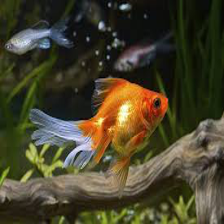

In [4]:
gold_fish = Image.open("goldfish.jfif").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish

array([[[0.18823529, 0.18823529, 0.09411765],
        [0.17647059, 0.17647059, 0.08235294],
        [0.16078431, 0.16470588, 0.06666667],
        ...,
        [0.05098039, 0.07843137, 0.00784314],
        [0.04313725, 0.04705882, 0.00784314],
        [0.04313725, 0.05098039, 0.00784314]],

       [[0.19215686, 0.19215686, 0.09019608],
        [0.18039216, 0.18039216, 0.07843137],
        [0.16470588, 0.16862745, 0.06666667],
        ...,
        [0.04705882, 0.07843137, 0.01176471],
        [0.04313725, 0.04705882, 0.00784314],
        [0.03921569, 0.04705882, 0.00392157]],

       [[0.19215686, 0.19215686, 0.08627451],
        [0.18431373, 0.18431373, 0.07843137],
        [0.17254902, 0.18039216, 0.06666667],
        ...,
        [0.04705882, 0.0745098 , 0.01176471],
        [0.03921569, 0.04313725, 0.00392157],
        [0.03921569, 0.04705882, 0.00392157]],

       ...,

       [[0.17647059, 0.16078431, 0.0745098 ],
        [0.17647059, 0.16078431, 0.07058824],
        [0.17647059, 0

In [7]:
gold_fish[np.newaxis, ...]

array([[[[0.18823529, 0.18823529, 0.09411765],
         [0.17647059, 0.17647059, 0.08235294],
         [0.16078431, 0.16470588, 0.06666667],
         ...,
         [0.05098039, 0.07843137, 0.00784314],
         [0.04313725, 0.04705882, 0.00784314],
         [0.04313725, 0.05098039, 0.00784314]],

        [[0.19215686, 0.19215686, 0.09019608],
         [0.18039216, 0.18039216, 0.07843137],
         [0.16470588, 0.16862745, 0.06666667],
         ...,
         [0.04705882, 0.07843137, 0.01176471],
         [0.04313725, 0.04705882, 0.00784314],
         [0.03921569, 0.04705882, 0.00392157]],

        [[0.19215686, 0.19215686, 0.08627451],
         [0.18431373, 0.18431373, 0.07843137],
         [0.17254902, 0.18039216, 0.06666667],
         ...,
         [0.04705882, 0.0745098 , 0.01176471],
         [0.03921569, 0.04313725, 0.00392157],
         [0.03921569, 0.04705882, 0.00392157]],

        ...,

        [[0.17647059, 0.16078431, 0.0745098 ],
         [0.17647059, 0.16078431, 0.07058824]

In [8]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [16]:
result

array([[ 0.32637236,  2.2555432 ,  8.039423  , ...,  0.6022592 ,
         0.4722591 , -0.89409286]], dtype=float32)

In [9]:
classifier.predict(gold_fish[np.newaxis, ...])

array([[ 0.32637236,  2.2555432 ,  8.039423  , ...,  0.6022592 ,
         0.4722591 , -0.89409286]], dtype=float32)

In [13]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/root/.keras/datasets/ImageNetLabels.txt'

In [14]:
image_labels=[]
with open("/root/.keras/datasets/ImageNetLabels.txt","r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
image_labels[predicted_label_index]

'goldfish'

**Load flowers dataset**


In [17]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 7s 0us/step


In [18]:

data_dir

'./datasets/flower_photos'

In [19]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [20]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [21]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [22]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

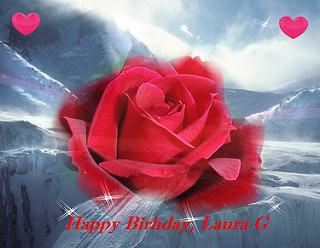

In [24]:
Image.open(str(roses[1]))

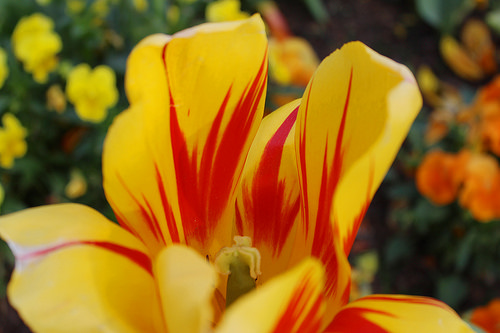

In [26]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[3]))

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [29]:

flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg')]

In [30]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [32]:
img.shape

(240, 320, 3)

In [33]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [38]:
X[0].shape

(224, 224, 3)

In [39]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [40]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

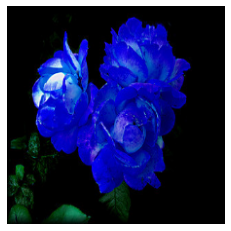

In [41]:
plt.axis('off')
plt.imshow(X[0])

In [42]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([612, 795, 795])

In [43]:
image_labels[795]

'shower curtain'

In [44]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [45]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 76s 832ms/step - loss: 0.8091 - acc: 0.7020
Epoch 2/5
86/86 [==============================] - 72s 836ms/step - loss: 0.4337 - acc: 0.8539
Epoch 3/5
86/86 [==============================] - 72s 833ms/step - loss: 0.3356 - acc: 0.8914
Epoch 4/5
86/86 [==============================] - 72s 833ms/step - loss: 0.2812 - acc: 0.9117
Epoch 5/5
86/86 [==============================] - 72s 833ms/step - loss: 0.2387 - acc: 0.9288


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 828ms/step - loss: 0.3345 - acc: 0.8922


[0.33448269963264465, 0.8921568393707275]